# Chapter 2: Predictive Inference

In labor economics an important question is what determines the wage of workers. This is a causal question, but we could begin to investigate from a predictive perspective.

In the following wage example, $Y$ is the hourly wage of a worker and $X$ is a vector of worker's characteristics, e.g., education, experience, gender.
Two main questions here are:    

* How to use job-relevant characteristics, such as education and experience, to best predict wages?

* What is the difference in predicted wages between men and women with the same job-relevant characteristics?

In this lab, we focus on the prediction question first.

## 2.1 Data

The data set we consider is from the March Supplement of the U.S. Current Population Survey, year 2015. We select white non-hispanic individuals, aged 25 to 64 years, and working more than 35 hours per week during at least 50 weeks of the year. We exclude self-employed workers; individuals living in group quarters; individuals in the military, agricultural or private household sectors; individuals with inconsistent reports on earnings and employment status; individuals with allocated or missing information in any of the variables used in the analysis; and individuals with hourly wage below $3$.

The variable of interest $Y$ is the hourly wage rate constructed as the ratio of the annual earnings to the total number of hours worked, which is constructed in turn as the product of number of weeks worked and the usual number of hours worked per week. In our analysis, we also focus on single (never married) workers. The final sample is of size $n = 5150$.

## 2.2 Data Analysis

### 2.2.1 Julia code

In [3]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Dates")
Pkg.add("Plots")
using CSV
using DataFrames
using Dates
using Plots

   Resolving package versions...
  No Changes to `C:\Users\Erzo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Erzo\.julia\environments\v1.10\Manifest.toml`
Precompiling project...
  ? StatsFuns
  ✓ Widgets
  ✓ FilePathsBase
  ✓ Latexify → DataFramesExt
  ✓ PyPlot
  ? StatsModels
  ? Distributions
  ✓ Plots → UnitfulExt
  ? GLM
  ? KernelDensity
  ✓ Plots → IJuliaExt
  ? Lathe
  ? StatsPlots
  ? Lasso
  ✓ CSV
  7 dependencies successfully precompiled in 17 seconds. 227 already precompiled.
  8 dependencies failed but may be precompilable after restarting julia
  8 dependencies had output during precompilation:
┌ StatsModels
│  WARNING: Method definition (::Type{Base.MPFR.BigFloat})(Base.Irrational{:twoπ}) in module IrrationalConstants at irrationals.jl:223 overwritten in module StatsFuns on the same line (check for duplicate calls to `include`).
│  ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of preco

In [4]:
#Reading the CSV file into a DataFrame
#We have to set the category type for some variable
data = CSV.File("C:/Users/Erzo/Documents/GitHub/CausalAI-Course/data/wage2015_subsample_inference.csv"; types = Dict("occ" => String,"occ2"=> String,"ind"=>String,"ind2"=>String)) |> DataFrame
println("Number of Rows : ", size(data)[1],"\n","Number of Columns : ", size(data)[2],) #rows

#data = CSV.File("..\..\wage2015_subsample_inference.csv"; types = Dict("occ" => String,"occ2"=> String,"ind"=>String,"ind2"=>String)) |> DataFrame
#println("Number of Rows : ", size(data)[1],"\n","Number of Columns : ", size(data)[2],) #rows
using CSV

# Filtrar las filas donde clg=1, ad=1, o scl=1
filtered_data = filter(row -> row.clg == 1 || row.ad == 1 || row.scl == 1, data)

# Convertir los datos filtrados a un DataFrame
data = DataFrame(filtered_data)


Number of Rows : 5150
Number of Columns : 21


,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10,9.61538,2.26336,1.0,0.0,0.0,0.0,1.0,0.0
2,12,48.0769,3.8728,0.0,0.0,0.0,0.0,1.0,0.0
3,18,13.9423,2.63493,1.0,0.0,0.0,0.0,0.0,1.0
4,19,28.8462,3.36198,1.0,0.0,0.0,0.0,1.0,0.0
5,30,11.7308,2.46222,1.0,0.0,0.0,0.0,1.0,0.0
6,71,19.2308,2.95651,1.0,0.0,0.0,0.0,1.0,0.0
7,84,12.0192,2.48651,1.0,0.0,0.0,1.0,0.0,0.0
8,89,13.4615,2.59984,1.0,0.0,0.0,1.0,0.0,0.0
9,96,16.3462,2.79399,1.0,0.0,0.0,0.0,1.0,0.0


In [53]:
# first 10 lines of the data
first(data,10)

Row,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String,String,String,String
1,10,9.61538,2.26336,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,0.49,0.343,0.2401,3600,11,8370,18
2,12,48.0769,3.8728,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,31.0,9.61,29.791,92.3521,3050,10,5070,9
3,18,13.9423,2.63493,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,25.0,6.25,15.625,39.0625,420,1,6990,12
4,19,28.8462,3.36198,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,22.0,4.84,10.648,23.4256,2015,6,9470,22
5,30,11.7308,2.46222,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.01,0.001,0.0001,1650,5,7460,14
6,71,19.2308,2.95651,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.16,0.064,0.0256,3255,10,8190,18
7,84,12.0192,2.48651,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.5,0.3025,0.166375,0.0915062,3600,11,8270,18
8,89,13.4615,2.59984,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,20.5,4.2025,8.61513,17.661,3645,11,8190,18
9,96,16.3462,2.79399,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,25.0,6.25,15.625,39.0625,110,1,7870,17


In [54]:
#a quick decribe of the data
describe(data)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,rownames,15750.1,10,15631.5,32643,0,Int64
2,wage,25.4361,3.02198,21.1538,490.196,0,Float64
3,lwage,3.06275,1.10591,3.05182,6.19481,0,Float64
4,sex,0.489136,0.0,0.0,1.0,0,Float64
5,shs,0.0,0.0,0.0,0.0,0,Float64
6,hsg,0.0,0.0,0.0,0.0,0,Float64
7,scl,0.379438,0.0,0.0,1.0,0,Float64
8,clg,0.433492,0.0,0.0,1.0,0,Float64
9,ad,0.187069,0.0,0.0,1.0,0,Float64


We are constructing the output variable $Y$ and the matrix $Z$ which includes the characteristics of workers that are given in the data.

In [5]:
n = size(data)[1]
z = select(data, Not([:rownames, :lwage, :wage]))
p = size(z)[2] 

println("Number of observations : ", n, "\n","Number of raw regressors:", p )

Number of observations : 3774
Number of raw regressors:18


For the outcome variable wage and a subset of the raw regressors, we calculate the empirical mean to get familiar with the data.

In [56]:
z_subset = select(data, ["lwage","sex","shs","hsg","scl","clg","ad","mw","so","we","ne","exp1"])
describe(z_subset, :mean)

Row,variable,mean
,Symbol,Float64
1,lwage,3.06275
2,sex,0.489136
3,shs,0.0
4,hsg,0.0
5,scl,0.379438
6,clg,0.433492
7,ad,0.187069
8,mw,0.249868
9,so,0.298357


# Prediction Question


Now, we will construct a prediction rule for hourly wage $Y$ , which depends linearly on job-relevant characteristics  $X$:

$$Y = \beta' X + \epsilon $$
 
Our goals are

* Predict wages using various characteristics of workers.

* Assess the predictive performance using the (adjusted) sample MSE, the (adjusted) sample $R^2$ and the out-of-sample $MSE$ and $R^2$.

We employ two different specifications for prediction:

- **Basic Model**: $X$ consists of a set of raw regressors (e.g. gender, experience, education indicators, occupation and industry indicators, regional indicators).

- **Flexible Model**: $X$ consists of all raw regressors from the basic model plus occupation and industry indicators, transformations (e.g.,$exp2$ and $exp3$) and additional two-way interactions of polynomial in experience with other regressors. An example of a regressor created through a two-way interaction is experience times the indicator of having a college degree.

Using the **Flexible Model**, enables us to approximate the real relationship by a more complex regression model and therefore to reduce the bias. The **Flexible Model** increases the range of potential shapes of the estimated regression function. In general, flexible models often deliver good prediction accuracy but give models which are harder to interpret.

Now, let us fit both models to our data by running ordinary least squares (ols):

In [6]:
#Needed Packages and extra just in case
Pkg.add("Plots")
Pkg.add("Lathe")
Pkg.add("GLM")
Pkg.add("StatsPlots")
Pkg.add("MLBase")

# Load the installed packages
using DataFrames
using CSV
using Plots
using Lathe
using GLM
using Statistics
using StatsPlots
using MLBase

   Resolving package versions...
  No Changes to `C:\Users\Erzo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Erzo\.julia\environments\v1.10\Manifest.toml`
Precompiling project...
  ? StatsFuns
  ? StatsModels
  ? Distributions
  ? GLM
  ? KernelDensity
  ? Lathe
  ? StatsPlots
  ? Lasso
   Resolving package versions...
  No Changes to `C:\Users\Erzo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Erzo\.julia\environments\v1.10\Manifest.toml`
Precompiling project...
  ? StatsFuns
  ? Distributions
  ? StatsModels
  ? KernelDensity
  ? GLM
  ? Lathe
  ? StatsPlots
  ? Lasso
   Resolving package versions...
  No Changes to `C:\Users\Erzo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Erzo\.julia\environments\v1.10\Manifest.toml`
Precompiling project...
  ? StatsFuns
  ? Distributions
  ? StatsModels
  ? KernelDensity
  ? GLM
  ? Lathe
  ? StatsPlots
  ? Lasso
   Resolving package versions...
  No Changes to `C:\Users\Erzo\.julia\en

  ? GLM
[ Info: Precompiling GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
┌ Warning: Module Distributions with build ID ffffffff-ffff-ffff-0000-c13c7f8024db is missing from the cache.
│ This may mean Distributions [31c24e10-a181-5473-b8eb-7969acd0382f] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a].
Precompiling StatsModels
  ? StatsFuns
        Info Given StatsModels was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? StatsModels
[ Info: Precompiling StatsModels [3eaba693-59b7-5ba5-a881-562e759f1c8d]
┌ Warning: Module StatsFuns with build ID ffffffff-ffff-ffff-0000-c13cdab781b0 is missing from the cache.
│ This may mean StatsFuns [4c63d2b9-4356-54db-8cca-17b64c39e42c] does not support precompi

In [7]:
#basic model
basic  = @formula(lwage ~ (sex + exp1 + shs + hsg+ scl +ad+ clg + mw + so + we + occ2+ ind2))
basic_results  = lm(basic, data)


StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

lwage ~ 1 + sex + exp1 + shs + hsg + scl + ad + clg + mw + so + we + occ2 + ind2

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────
                    Coef.     Std. Error       t  Pr(>|t|)     Lower 95%      Upper 95%
───────────────────────────────────────────────────────────────────────────────────────
(Intercept)   3.08046        0.0651506     47.28    <1e-99    2.95273       3.2082
sex          -0.0690466      0.0171699     -4.02    <1e-04   -0.10271      -0.0353833
exp1          0.00888554     0.000767853   11.57    <1e-29    0.00738009    0.010391
shs           0.0          NaN            NaN       NaN     NaN           NaN
hsg           0.0          NaN            NaN       NaN     NaN           NaN
scl           0.0          NaN       

In [8]:
#flexible model
flex = @formula(lwage ~ sex + shs+hsg+scl+ad+clg+occ2+ind2+mw+so+we + (exp1+exp2+exp3+exp4)*(shs+hsg+ad+scl+clg+occ2+ind2+mw+so+we))
regflex = lm(flex, data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

lwage ~ 1 + sex + shs + hsg + scl + ad + clg + occ2 + ind2 + mw + so + we + exp1 + exp2 + exp3 + exp4 + exp1 & shs + exp1 & hsg + exp1 & ad + exp1 & scl + exp1 & clg + exp1 & occ2 + exp1 & ind2 + exp1 & mw + exp1 & so + exp1 & we + exp2 & shs + exp2 & hsg + exp2 & ad + exp2 & scl + exp2 & clg + exp2 & occ2 + exp2 & ind2 + exp2 & mw + exp2 & so + exp2 & we + exp3 & shs + exp3 & hsg + exp3 & ad + exp3 & scl + exp3 & clg + exp3 & occ2 + exp3 & ind2 + exp3 & mw + exp3 & so + exp3 & we + exp4 & shs + exp4 & hsg + exp4 & ad + exp4 & scl + exp4 & clg + exp4 & occ2 + exp4 & ind2 + exp4 & mw + exp4 & so + exp4 & we

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────
                       Coef.   Std. Error       t  Pr(>|t|)    Lower 95%     Upper 95%
────

### Try Lasso next

In [9]:
Pkg.add("Lasso")
using Lasso

   Resolving package versions...
  No Changes to `C:\Users\Erzo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Erzo\.julia\environments\v1.10\Manifest.toml`
Precompiling project...
  ? StatsFuns
  ? Distributions
  ? StatsModels
  ? KernelDensity
  ? GLM
  ? Lathe
  ? StatsPlots
  ? Lasso
Precompiling Lasso
  ? StatsFuns
  ? StatsModels
  ? Distributions
  ? GLM
        Info Given Lasso was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? Lasso
[ Info: Precompiling Lasso [b4fcebef-c861-5a0f-a7e2-ba9dc32b180a]
┌ Warning: Module GLM with build ID ffffffff-ffff-ffff-0000-c13f0334f7f1 is missing from the cache.
│ This may mean GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing Lasso

In [10]:
flex = @formula(lwage ~ sex + ad+scl+clg+occ2+ind2+mw+so+we + (exp1+exp2+exp3+exp4)*(ad+scl+clg+occ2+ind2+mw+so+we))
lasso_model = fit(LassoModel, flex, data)

StatsModels.TableRegressionModel{LassoModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, MinAICc}, Matrix{Float64}}

lwage ~ sex + ad + scl + clg + occ2 + ind2 + mw + so + we + exp1 + exp2 + exp3 + exp4 + exp1 & ad + exp1 & scl + exp1 & clg + exp1 & occ2 + exp1 & ind2 + exp1 & mw + exp1 & so + exp1 & we + exp2 & ad + exp2 & scl + exp2 & clg + exp2 & occ2 + exp2 & ind2 + exp2 & mw + exp2 & so + exp2 & we + exp3 & ad + exp3 & scl + exp3 & clg + exp3 & occ2 + exp3 & ind2 + exp3 & mw + exp3 & so + exp3 & we + exp4 & ad + exp4 & scl + exp4 & clg + exp4 & occ2 + exp4 & ind2 + exp4 & mw + exp4 & so + exp4 & we

Coefficients:
LassoModel using MinAICc(2) segment of the regularization path.

Coefficients:
──────────────────
          Estimate
──────────────────
x1     3.18932
x2    -0.0576654
x3     0.160123
x4    -0.243738
x5     0.0
x6     0.00889961
x7    -0.402182
x8    -0.144702
x9    -0.14743
x

# Descriptive Graphs

In [ ]:
Wage

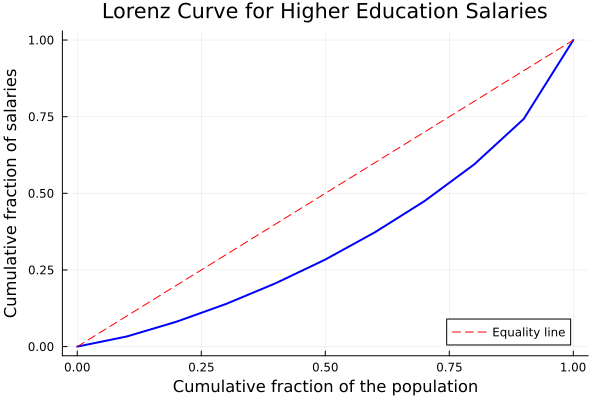

In [11]:
using Statistics
using Plots


wage_sorted = sort(data.wage)
cumulative_sum = cumsum(wage_sorted)
deciles = [percentile(cumulative_sum, p) for p in 0:10:100]
population_fraction = collect(0:0.1:1)

# Calcular la fracción acumulativa de salarios
salary_fraction = [percentile(deciles ./ sum(data.wage), p) for p in 0:10:100]

# Graficar la curva de Lorenz
plot(population_fraction, salary_fraction, linewidth=2, color=:blue, label="")
plot!([0, 1], [0, 1], linestyle=:dash, linewidth=1, color=:red, label="Equality line",
    title="Lorenz Curve for Higher Education Salaries",
    xlabel="Cumulative fraction of the population",
    ylabel="Cumulative fraction of salaries",
    legend=:bottomright)


In [ ]:
LwAGE

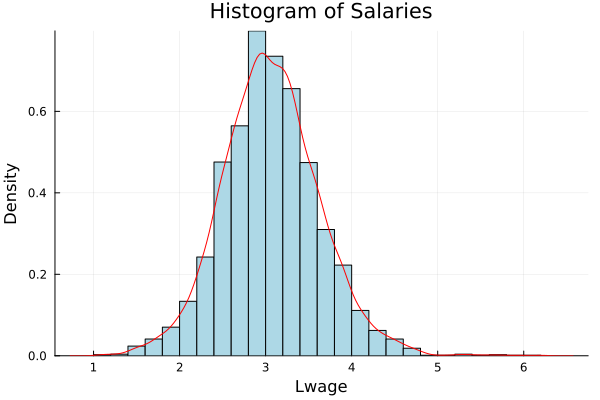

In [12]:
using Plots
using StatsPlots

# Configurar el estilo
default(; legend = false)

# Crear el histograma de los salarios
histogram(data.lwage, bins=30, color=:lightblue, edgecolor=:black, normed=true, xlabel="Lwage", ylabel="Density",
    title="Histogram of Salaries")

# Crear la función de densidad
density!(data.lwage, color=:red, linewidth=1)



In [ ]:
Sex

In [14]:
import Pkg
Pkg.add("PyPlot")
Pkg.add("Distributions")


   Resolving package versions...
  No Changes to `C:\Users\Erzo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Erzo\.julia\environments\v1.10\Manifest.toml`
Precompiling project...
  ? StatsFuns
  ? Distributions
  ? StatsModels
  ? KernelDensity
  ? Lathe
  ? GLM
  ? StatsPlots
  ? Lasso
   Resolving package versions...
  No Changes to `C:\Users\Erzo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Erzo\.julia\environments\v1.10\Manifest.toml`
Precompiling project...
  ? StatsFuns
  ? StatsModels
  ? Distributions
  ? GLM
  ? KernelDensity
  ? Lathe
  ? StatsPlots
  ? Lasso


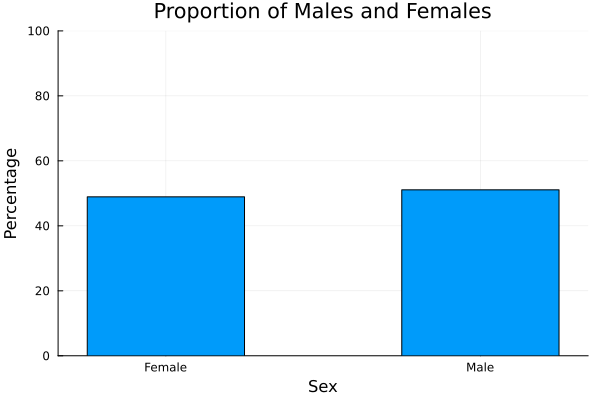

Total observations: 3774


In [42]:
using DataFrames
using Statistics
using Plots

# Calcular las proporciones de sexos
proportions = combine(groupby(data, :sex), nrow => :count)

# Calcular el total de observaciones
total_obs = sum(proportions.count)

# Asignar etiquetas 'Male' y 'Female'
proportions[!, :sex_label] = ifelse.(proportions.sex .== 0, "Male", "Female")

# Calcular las proporciones
proportions[!, :percentage] = proportions.count ./ total_obs * 100

# Graficar las proporciones sin leyenda
display(bar(proportions.sex_label, proportions[!, :percentage],
    xlabel = "Sex", ylabel = "Percentage",
    title = "Proportion of Males and Females",
    ylims = (0, 100),
    bar_width = 0.5,
    fmt = :png))

# Mostrar el número total de observaciones
println("Total observations: ", total_obs)


In [43]:
Dummies college

LoadError: UndefVarError: `Dummies` not defined

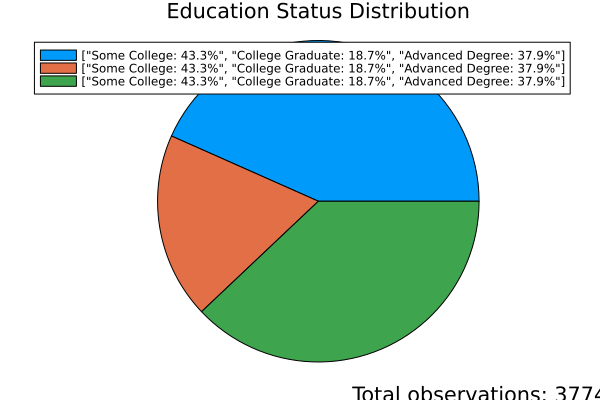

In [59]:
using DataFrames
using Statistics
using Plots

# Crear la variable 'Education_Status'
data[!, "Education_Status"] .= ifelse.(data.scl .== 1, "Some College",
                                      ifelse.(data.clg .== 1, "College Graduate", "Advanced Degree"))

# Calcular la frecuencia de educación
edu_freq = combine(groupby(data, :Education_Status), nrow => :Frequency)

# Calcular el total de observaciones
total_obs = sum(edu_freq.Frequency)

# Calcular el porcentaje
edu_freq[!, :Percentage] = edu_freq.Frequency / total_obs * 100

# Definir colores y etiquetas
# Crear el gráfico de pastel
pie(edu_freq.Frequency, labels=string.(labels, ": ", round.(edu_freq.Percentage, digits=1), "%"), startangle=90, 
    title="Education Status Distribution", 
    legend=:topright, 
    fmt=:png, 
    aspect_ratio=1,
    pct=true)

# Añadir el número total de observaciones
annotate!(1, -1.2, text("Total observations: $total_obs", halign=:center, valign=:center))


In [ ]:
Experience Higher Education

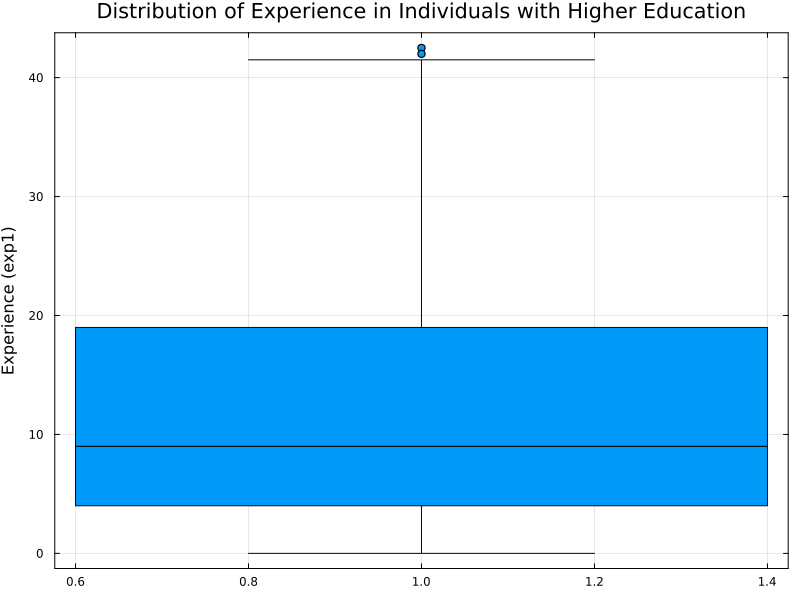

In [60]:
using DataFrames
using Plots

plt = plot(size=(800, 600))
boxplot!(data.exp1, box=:box, whiskerwidth=0.2, title="Distribution of Experience in Individuals with Higher Education",
    ylabel="Experience (exp1)", legend=false)


In [ ]:
COEFFICIENTS FOR DIFFERENT MODELS

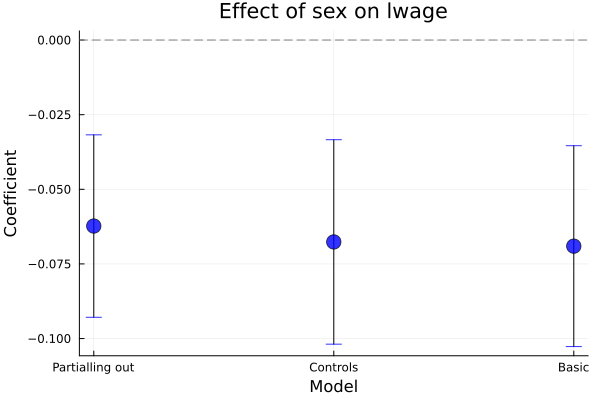

In [88]:
using DataFrames
using GLM
using Statistics
using Plots


# Ajustar los modelos
flex_y = @formula(lwage ~ exp1+exp2+exp3+exp4+scl+clg+ad+occ2+ind2+mw+so+we+(exp1+exp2+exp3+exp4)*(scl+clg+ad+occ2+ind2+mw+so+we) ) # modelo para Y
flex_d = @formula(sex ~ exp1+exp2+exp3+exp4+scl+clg+ad+occ2+ind2+mw+so+we+(exp1+exp2+exp3+exp4)*(scl+clg+ad+occ2+ind2+mw+so+we))  # modelo para D

# Ajustar el efecto lineal parcial de W desde Y
t_Y = residuals(lm(flex_y, data))
# Ajustar el efecto lineal parcial de W desde D
t_D = residuals(lm(flex_d, data))
# Crear un nuevo DataFrame con las variables relevantes para t_Y y t_D
residuals_df = DataFrame(t_Y=t_Y, t_D=t_D)

# Ajustar la regresión lineal entre t_Y y t_D
partial_fit = lm(@formula(t_D ~ t_Y), residuals_df)

# Ajustar los modelos
basic_fit = lm(@formula(lwage ~ sex + exp1 + scl + clg + ad + mw + so + we + occ2 + ind2), data)

control_fit = lm(@formula(lwage ~ sex + exp1+exp2+exp3+exp4+scl+clg+ad+occ2+ind2+mw+so+we+(exp1+exp2+exp3+exp4)*(scl+clg+ad+occ2+ind2+mw+so+we)), data)

using Plots

# Extraer los coeficientes para sex y los errores estándar de las últimas dos regresiones
coefs = Dict("Basic" => coef(basic_fit)[2],
             "Controls" => coef(control_fit)[2],
             "Partialling out" => coef(partial_fit)[2])  # El coeficiente de interés es el segundo en partial_fit

ses = Dict("Basic" => stderror(basic_fit)[2],
           "Controls" => stderror(control_fit)[2],
           "Partialling out" => stderror(partial_fit)[2])  # El error estándar correspondiente al coeficiente de interés

# Gráfico de dispersión con barras de error
scatter_plot = scatter(coefs, yerr=1.96 .* collect(values(ses)), legend=false, 
    xlabel="Model", ylabel="Coefficient", title="Effect of sex on lwage",
    markershape=:circle, markercolor=:blue, markerstrokecolor=:black,
    markersize=8, markeralpha=0.8)

# Línea horizontal en y=0
hline!(scatter_plot, [0], color="gray", linestyle=:dash)

# Mostrar el gráfico
display(scatter_plot)


In [ ]:
#The coefficient associated with the gender variable, which indicates the prediction of being female on salary, is initially 
# negative. This suggests that, on average, women have lower salaries than men. However, after adding these controls, 
# such as work experience or educational level, the negative coefficient associated with the gender variable becomes 
# less negative.
# 
# This change in the gender coefficient could be explained by the fact that the control variables are capturing
# some of the variability in salaries that was previously incorrectly attributed to gender. This suggests 
# that additional factors, beyond gender, are influencing salaries, and the impact of gender on salaries 
# is less pronounced once these other variables are taken into account.Besides, both FWL and including control 
# variables in the regression model yield coefficient estimates for the variable of interest that reflect its net
# impact on the dependent variable, once the effects of other explanatory variables have been taken into account.


# Women and male graph (quartic)

In [85]:
import Pkg
Pkg.add("StatsModels")


   Resolving package versions...
    Updating `C:\Users\Erzo\.julia\environments\v1.10\Project.toml`
⌅ [3eaba693] + StatsModels v0.6.33
  No Changes to `C:\Users\Erzo\.julia\environments\v1.10\Manifest.toml`
Precompiling project...
  ? StatsFuns
  ? StatsModels
  ? Distributions
  ? GLM
  ? KernelDensity
  ? Lathe
  ? StatsPlots
  ? Lasso


In [87]:
import Pkg
Pkg.add("Loess")


   Resolving package versions...
   Installed Loess ─ v0.6.3
    Updating `C:\Users\Erzo\.julia\environments\v1.10\Project.toml`
  [4345ca2d] + Loess v0.6.3
    Updating `C:\Users\Erzo\.julia\environments\v1.10\Manifest.toml`
  [4345ca2d] + Loess v0.6.3
Precompiling project...
  ? StatsFuns
  ✓ Loess
  ? Distributions
  ? StatsModels
  ? KernelDensity
  ? GLM
  ? Lathe
  ? StatsPlots
  ? Lasso
  1 dependency successfully precompiled in 17 seconds. 234 already precompiled.
  8 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions
  8 dependencies failed but may be precompilable after restarting julia
  8 dependencies had output during precompilation:
┌ StatsModels
│  WARNING: Method definition (::Type{Base.MPFR.BigFloat})(Base.Irrational{:twoπ}) in module IrrationalConstants at irrationals.jl:223 overwritten in module StatsFuns on the same line (check for duplicate calls to `include`).
│  ERROR: Method overwriting is not permitted

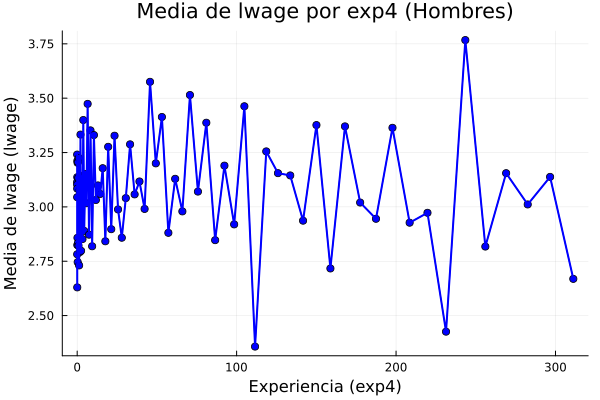

In [140]:
using DataFrames
using Statistics
using Plots

# Supongamos que tienes un DataFrame llamado data con las columnas lwage, exp4 y sex

# Creamos un DataFrame separado para hombres y mujeres
data_male = filter(row -> row.sex == 0, data)


# Calculamos las medias de lwage para cada valor único de exp4 para hombres
mean_lwage_male = combine(groupby(data_male, :exp4), :lwage => mean => :mean_lwage)

# Ordenar el DataFrame por exp4
sort!(mean_lwage_male, :exp4)

# Crear el gráfico para hombres
plot(mean_lwage_male.exp4, mean_lwage_male.mean_lwage, color=:blue, label="Mean lwage (Male)",
    xlabel="Experiencia (exp4)", ylabel="Media de lwage (lwage)", title="Media de lwage por exp4 (Hombres)", marker=:circle)
plot!(mean_lwage_male.exp4, mean_lwage_male.mean_lwage, color=:blue, linewidth=2, linestyle=:solid, label="")


In [143]:
using Pkg
Pkg.add("Loess")


   Resolving package versions...
  No Changes to `C:\Users\Erzo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Erzo\.julia\environments\v1.10\Manifest.toml`
Precompiling project...
  ? StatsFuns
  ? StatsModels
  ? Distributions
  ? GLM
  ? KernelDensity
  ? StatsPlots
  ? Lasso
  ? Lathe


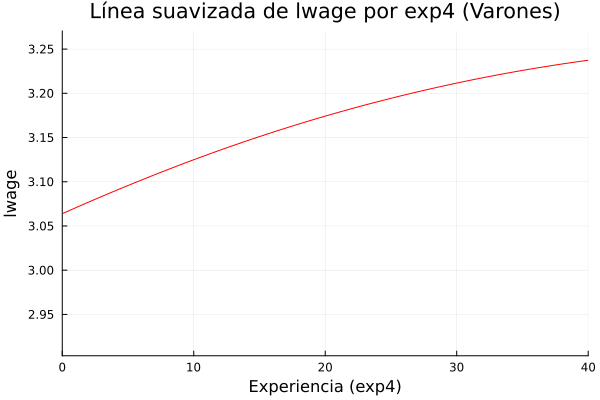

In [159]:
using DataFrames
using Plots
using Loess

# Supongamos que tienes un DataFrame llamado data con las columnas lwage, exp4 y sex

# Creamos un DataFrame separado solo para varones
data_male = filter(row -> row.sex == 0, data)

# Extraemos las variables independientes y dependientes para el modelo LOESS
exp4_male = data_male.exp4
lwage_male = data_male.lwage

# Ajustamos un modelo LOESS para varones con un span de ** para menos suavizamiento
loess_model_male = loess(exp4_male, lwage_male, span=0.95)

# Generamos predicciones para el modelo LOESS
exp4_range_male = range(minimum(exp4_male), maximum(exp4_male), length=500)
lwage_pred_male = predict(loess_model_male, exp4_range_male)

# Creamos el gráfico para varones con la línea suavizada
plot(exp4_range_male, lwage_pred_male, color=:red, label="Smoothed lwage (Male)")
xlabel!("Experiencia (exp4)")
ylabel!("lwage")
title!("Línea suavizada de lwage por exp4 (Varones)")
xlims!(0, 40)  # Limitar el eje x de 0 a 40


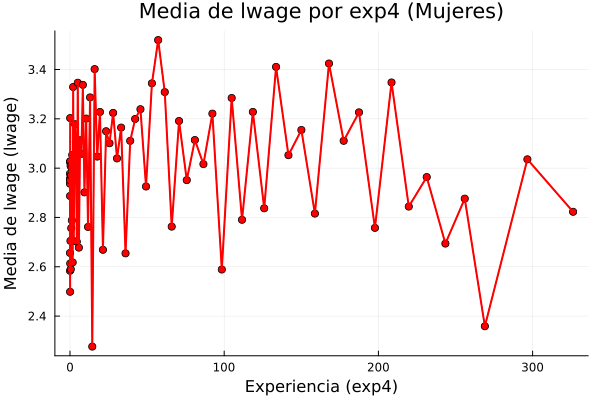

In [138]:
data_female = filter(row -> row.sex == 1, data)
# Calculamos las medias de lwage para cada valor único de exp4 para mujeres
mean_lwage_female = combine(groupby(data_female, :exp4), :lwage => mean => :mean_lwage)

# Ordenar el DataFrame por exp4
sort!(mean_lwage_female, :exp4)

# Crear el gráfico para mujeres
plot(mean_lwage_female.exp4, mean_lwage_female.mean_lwage, color=:red, label="Mean lwage (Female)",
    xlabel="Experiencia (exp4)", ylabel="Media de lwage (lwage)", title="Media de lwage por exp4 (Mujeres)", marker=:circle)
plot!(mean_lwage_female.exp4, mean_lwage_female.mean_lwage, color=:red, linewidth=2, linestyle=:solid, label="")


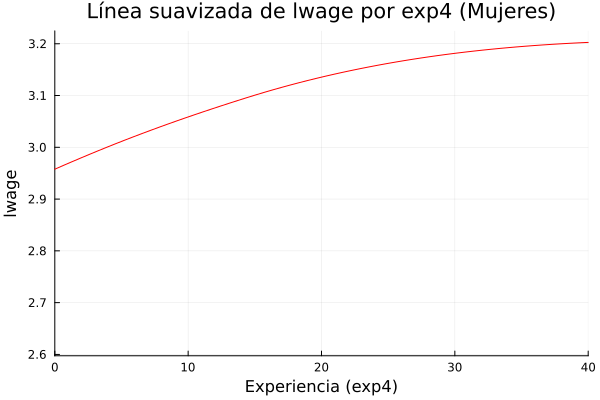

In [160]:
using DataFrames
using Plots
using Loess

# Supongamos que tienes un DataFrame llamado data con las columnas lwage, exp4 y sex

# Creamos un DataFrame separado solo para mujeres
data_female = filter(row -> row.sex == 1, data)

# Extraemos las variables independientes y dependientes para el modelo LOESS
exp4_female = data_female.exp4
lwage_female = data_female.lwage

# Ajustamos un modelo LOESS para mujeres con un span de 0.95 para menos suavizamiento
loess_model_female = loess(exp4_female, lwage_female, span=0.95)

# Generamos predicciones para el modelo LOESS
exp4_range_female = range(minimum(exp4_female), maximum(exp4_female), length=500)
lwage_pred_female = predict(loess_model_female, exp4_range_female)

# Creamos el gráfico para mujeres con la línea suavizada
plot(exp4_range_female, lwage_pred_female, color=:red, label="Smoothed lwage (Female)")
xlabel!("Experiencia (exp4)")
ylabel!("lwage")
title!("Línea suavizada de lwage por exp4 (Mujeres)")
xlims!(0, 40)  # Limitar el eje x de 0 a 40


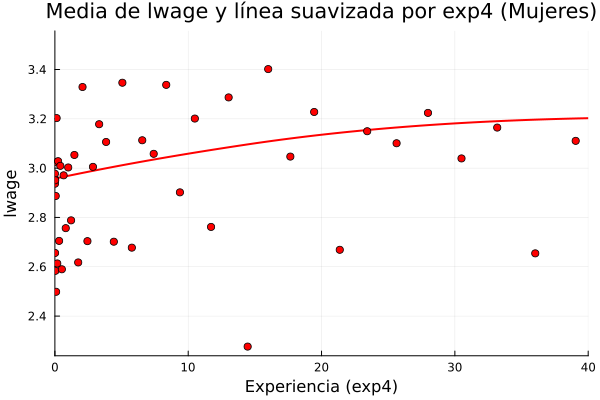

In [162]:
using DataFrames
using Plots
using Loess

# Supongamos que tienes un DataFrame llamado data con las columnas lwage, exp4 y sex

# Creamos un DataFrame separado solo para mujeres
data_female = filter(row -> row.sex == 1, data)

# Calculamos las medias de lwage para cada valor único de exp4 para mujeres
mean_lwage_female = combine(groupby(data_female, :exp4), :lwage => mean => :mean_lwage)

# Ordenar el DataFrame por exp4
sort!(mean_lwage_female, :exp4)

# Extraemos las variables independientes y dependientes para el modelo LOESS
exp4_female = data_female.exp4
lwage_female = data_female.lwage

# Ajustamos un modelo LOESS para mujeres con un span de 0.95 para menos suavizamiento
loess_model_female = loess(exp4_female, lwage_female, span=0.95)

# Generamos predicciones para el modelo LOESS
exp4_range_female = range(minimum(exp4_female), maximum(exp4_female), length=500)
lwage_pred_female = predict(loess_model_female, exp4_range_female)

# Creamos el gráfico para mujeres con la línea suavizada y los puntos unidos
plot(exp4_range_female, lwage_pred_female, color=:red, label="Smoothed lwage (Female)", linewidth=2)
scatter!(mean_lwage_female.exp4, mean_lwage_female.mean_lwage, color=:red, label="", marker=:circle, seriestype=:line)
xlabel!("Experiencia (exp4)")
ylabel!("lwage")
title!("Media de lwage y línea suavizada por exp4 (Mujeres)")
xlims!(0, 40)  # Limitar el eje x de 0 a 40
